In [1]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv('Verbatims_data2.csv')

In [3]:
df.head()

,BU,OII Related,RateOfOII,Login Related Flag,Number of Records,OFFERING,RATING,REVIEW_TEXT,app_identifier,app_store,bank_flag,count,review_date,score,tag,title
0,CTG,0,0,False,1,My Refund,5,Great app,com.intuit.mobile.mytaxrefund,Google,0,NaN,2/10/15,0,RATING ROLLUP,Great
1,CTG,0,0,False,1,TurboTax,5,Great,com.intuit.turbotax,Apple,0,NaN,1/17/17,0,RATING ROLLUP,Great
2,SBG,0,0,False,1,QB Self Employed,3,Please include a way to clear all notification...,com.intuit.qbse,Apple,0,NaN,6/27/17,0,RATING ROLLUP,Notifications!!!
3,CTG,0,0,False,1,TurboTax,1,I have been working on a efile for 9 days th...,com.intuit.turbotax.mobile,Google,0,NaN,3/8/16,0,RATING ROLLUP,None
4,CTG,0,0,False,1,TurboTax,1,It now forces you to pay 30 dollars if you wa...,com.intuit.turbotax.mobile,Google,0,NaN,1/20/17,0,RATING ROLLUP,None


In [6]:
reviews_df = df[['REVIEW_TEXT', 'title', 'RATING']].copy()
reviews_df.columns = ['review_text', 'title', 'rating']
reviews_df.head()

,review_text,title,rating
0,Great app,Great,5
1,Great,Great,5
2,Please include a way to clear all notification...,Notifications!!!,3
3,I have been working on a efile for 9 days th...,None,1
4,It now forces you to pay 30 dollars if you wa...,None,1


In [7]:
analyzer = SentimentIntensityAnalyzer()

In [8]:
reviews_df['text_compound'] = reviews_df['review_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

In [10]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155161 entries, 0 to 155160
Data columns (total 4 columns):
review_text      155161 non-null object
title            154955 non-null object
rating           155161 non-null int64
text_compound    155161 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.7+ MB


In [11]:
reviews_df['title_compound'] = reviews_df['title'].apply(lambda text: analyzer.polarity_scores(str(text))['compound'])

In [12]:
reviews_df

,review_text,title,rating,text_compound,title_compound
0,Great app,Great,5,0.6249,0.6249
1,Great,Great,5,0.6249,0.6249
2,Please include a way to clear all notification...,Notifications!!!,3,0.5994,0.0000
3,I have been working on a efile for 9 days th...,None,1,0.7650,0.0000
4,It now forces you to pay 30 dollars if you wa...,None,1,-0.1280,0.0000
5,"Love it, keeps me organized and simple to use",Love it,5,0.6369,0.6369
6,"By far my favorite financial app, makes everyt...",Love it,4,0.7003,0.6369
7,I used MYOB for years and naturally moved to e...,So much better than MYOB,5,0.6908,0.4902
8,I love the reminders when bills are coming due.,Great help,5,0.6369,0.7783
9,"Looks promising but a number of my accounts, t...",None,3,-0.6727,0.0000


In [28]:
def get_sentiment(text_compound, title_compound):
    """
    @:type text_compound: float64
    @:param text_compound: the compound score for the review text
    @:type title_compound: float64
    @:param title_compound: the compound score for the title
    @:type return: string
    @:param return: the sentiment for the corresponding text
    """
    score = 0
    if title_compound == 0.0:
        score = text_compound
    else:
        score = 0.5 * (text_compound + title_compound)
    
    if score >= 0.05:
        return 'Positive'
    elif score > -0.05:
        return 'Neutral'
    else:
        return 'Negative'

In [33]:
reviews_df['sentiment'] = reviews_df.apply(lambda row : get_sentiment(row['text_compound'], row['title_compound']), axis=1)

In [34]:
reviews_df

,review_text,title,rating,text_compound,title_compound,sentiment
0,Great app,Great,5,0.6249,0.6249,Positive
1,Great,Great,5,0.6249,0.6249,Positive
2,Please include a way to clear all notification...,Notifications!!!,3,0.5994,0.0000,Positive
3,I have been working on a efile for 9 days th...,None,1,0.7650,0.0000,Positive
4,It now forces you to pay 30 dollars if you wa...,None,1,-0.1280,0.0000,Negative
5,"Love it, keeps me organized and simple to use",Love it,5,0.6369,0.6369,Positive
6,"By far my favorite financial app, makes everyt...",Love it,4,0.7003,0.6369,Positive
7,I used MYOB for years and naturally moved to e...,So much better than MYOB,5,0.6908,0.4902,Positive
8,I love the reminders when bills are coming due.,Great help,5,0.6369,0.7783,Positive
9,"Looks promising but a number of my accounts, t...",None,3,-0.6727,0.0000,Negative


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['patch.force_edgecolor'] = True

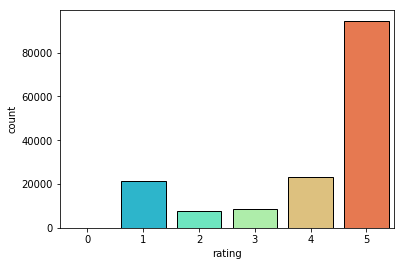

In [59]:
sns.countplot(x='rating', data=reviews_df, palette='rainbow')

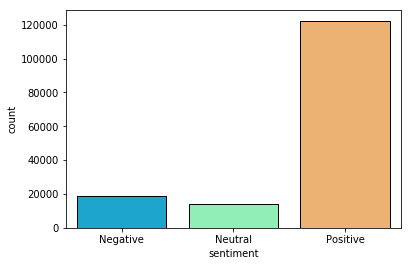

In [64]:
sns.countplot(x='sentiment', order=['Negative', 'Neutral', 'Positive'], data=reviews_df, palette='rainbow')

In [71]:
def is_well_classified(rating, sentiment):
    """
    @:type rating: int64
    @:param rating: the rating for the corresponding record
    @:type sentiment: string
    @:param sentiment: the sentiment predicted by the vaderSentiment model
    @:type return: bool
    @:param return: true if well-classified records
    
    if the record satisfies the following rules, it is considered as well-classified
    rating = 4, 5, and sentiment = Positive
    rating = 2, 3, and sentiment = Neutral
    raitng = 0, 1, and sentiment = Negative
    """
    if sentiment == 'Positive':
        return rating == 4 or rating == 5
    elif sentiment == 'Neutral':
        return rating == 2 or rating == 3
    elif sentiment == 'Negative':
        return rating == 0 or rating == 1
    else:
        return False

In [72]:
num_well_classified = reviews_df.apply(lambda row: is_well_classified(row['rating'], row['sentiment']), axis=1).sum()

In [73]:
print('%.2f%% of data are well-classified' % (100.0 * num_well_classified / len(reviews_df)))

77.61% of data are well-classified
